In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
import seaborn as sns
import scipy.stats as sps

plt.rcParams['font.family'] ='Malgun Gothic'
plt.rcParams['axes.unicode_minus'] =False

In [22]:
df = pd.read_csv("C:/Users/User/github/Quant/data/kospi_category.csv", encoding='cp949')

In [24]:
start_date = '2004-01-01'
end_date = '2020-03-01'
 
df.index = pd.date_range(start_date,end_date,freq='m')

In [30]:
df.drop('date',axis=1, inplace=True)

In [31]:
df

,제조업,음식료품,섬유의복,종이목재,화학,의약품,비금속광물,철강금속,기계,전기전자,...,유통업,전기가스업,건설업,운수창고업,통신업,금융업,은행,증권,보험,서비스업
2004-01-31,1481.36,1301.41,87.67,181.95,1030.53,1181.26,850.49,1788.47,404.42,5205.42,...,224.08,604.60,63.13,972.18,335.00,263.87,191.01,1069.30,5300.97,355.96
2004-02-29,1534.92,1273.45,87.14,204.97,1116.18,1269.49,832.06,1963.28,439.56,5379.51,...,223.29,621.45,65.84,944.13,349.87,284.40,203.09,1121.27,5538.77,368.91
2004-03-31,1566.62,1258.50,82.87,206.01,1110.90,1241.57,807.16,1851.05,444.92,5685.00,...,216.23,611.06,65.94,888.41,325.26,270.62,187.51,1064.50,5818.82,389.92
2004-04-30,1523.14,1334.90,83.46,189.07,1139.42,1277.78,835.93,1674.74,400.92,5533.12,...,253.01,603.30,66.44,802.05,307.35,260.67,182.69,996.81,5895.44,417.70
2004-05-31,1400.71,1218.45,75.89,169.21,1091.50,1146.92,736.18,1586.80,359.56,5006.79,...,265.51,585.04,59.31,774.69,298.39,237.73,171.75,844.79,5455.42,400.59
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-10-31,4971.85,3410.15,282.12,338.47,4559.73,10792.64,1507.52,3508.32,698.16,18208.01,...,350.33,825.45,93.38,1280.08,339.66,390.70,246.57,1678.24,12886.06,1166.28
2019-11-30,4930.53,3431.14,287.74,330.44,4479.44,10229.68,1468.46,3605.86,673.26,18186.96,...,355.86,878.30,91.72,1298.96,348.64,401.50,245.59,1709.26,13464.64,1176.93
2019-12-31,5273.05,3480.12,289.14,330.11,4591.69,11031.00,1489.51,3693.15,701.59,20207.86,...,369.33,876.02,94.07,1330.05,345.69,409.49,246.62,1739.59,13698.26,1219.07
2020-01-31,5160.22,3295.05,259.04,352.95,4267.39,10902.30,1408.72,3395.63,649.76,20403.97,...,350.09,794.12,86.48,1250.76,329.30,372.14,224.73,1596.21,12249.88,1202.74


In [32]:
df.describe()

,제조업,음식료품,섬유의복,종이목재,화학,의약품,비금속광물,철강금속,기계,전기전자,...,유통업,전기가스업,건설업,운수창고업,통신업,금융업,은행,증권,보험,서비스업
count,194.000000,194.000000,194.000000,194.000000,194.000000,194.000000,194.000000,194.000000,194.000000,194.000000,...,194.000000,194.000000,194.000000,194.000000,194.000000,194.000000,194.000000,194.000000,194.000000,194.000000
mean,3598.759278,3245.870361,228.667938,323.290773,3719.030773,5558.508093,1088.214175,4753.751186,1020.523093,9776.756237,...,443.066804,1077.680258,165.199278,1974.501856,325.659742,451.484948,273.738351,2105.384948,15918.535155,894.790155
std,1192.957597,1169.172889,87.636579,65.517214,1497.520152,3350.213896,377.629677,1434.904103,378.267020,4371.988765,...,92.309759,245.200998,73.138119,663.436752,39.873315,90.278926,58.636475,713.229847,4298.833541,260.310274
min,1283.640000,1191.670000,70.230000,156.530000,1030.530000,1146.920000,531.950000,1586.800000,356.030000,4111.470000,...,216.230000,585.040000,55.090000,774.690000,205.610000,211.740000,136.960000,751.070000,4787.140000,355.960000
25%,2512.090000,2319.210000,173.150000,279.282500,2482.760000,3395.860000,776.390000,3841.730000,819.870000,6065.097500,...,404.995000,895.405000,114.925000,1461.790000,304.080000,410.027500,229.542500,1679.677500,14082.752500,676.702500
50%,3960.675000,3184.415000,222.990000,330.640000,4069.190000,4250.495000,975.785000,4887.220000,934.035000,8885.320000,...,465.895000,1062.935000,144.745000,1896.850000,329.530000,446.470000,267.375000,1929.090000,17209.885000,962.950000
75%,4335.595000,4202.632500,287.097500,364.767500,5025.122500,7943.030000,1380.930000,5736.392500,1209.702500,11385.350000,...,508.045000,1245.165000,202.657500,2387.835000,350.445000,509.000000,327.222500,2495.780000,18571.052500,1116.590000
max,5837.070000,5943.880000,482.420000,489.560000,6385.570000,14878.960000,2030.560000,7904.440000,2526.010000,20403.970000,...,642.480000,1739.510000,444.310000,4379.890000,418.780000,702.000000,383.750000,4714.930000,25294.500000,1362.900000


<AxesSubplot: >

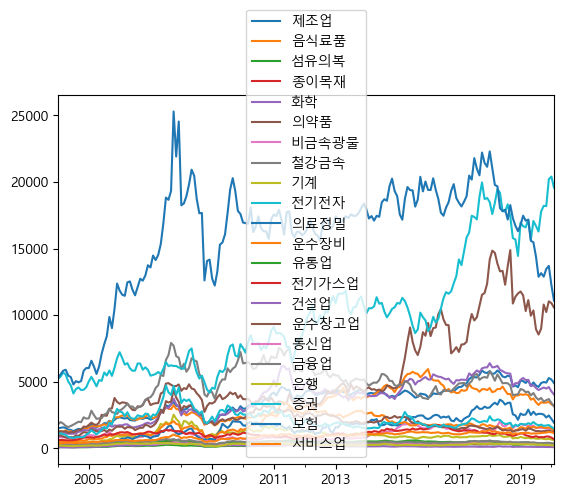

In [33]:
df.plot()

for i in range(len(df.columns)):
    x = df.iloc[:,i]
    plt.plot(x)
    plt.title(df.columns[i])
    plt.savefig("C:/Users/User/github/Quant/data/"+df.columns[i]+".png")
    plt.cla()

<AxesSubplot: >

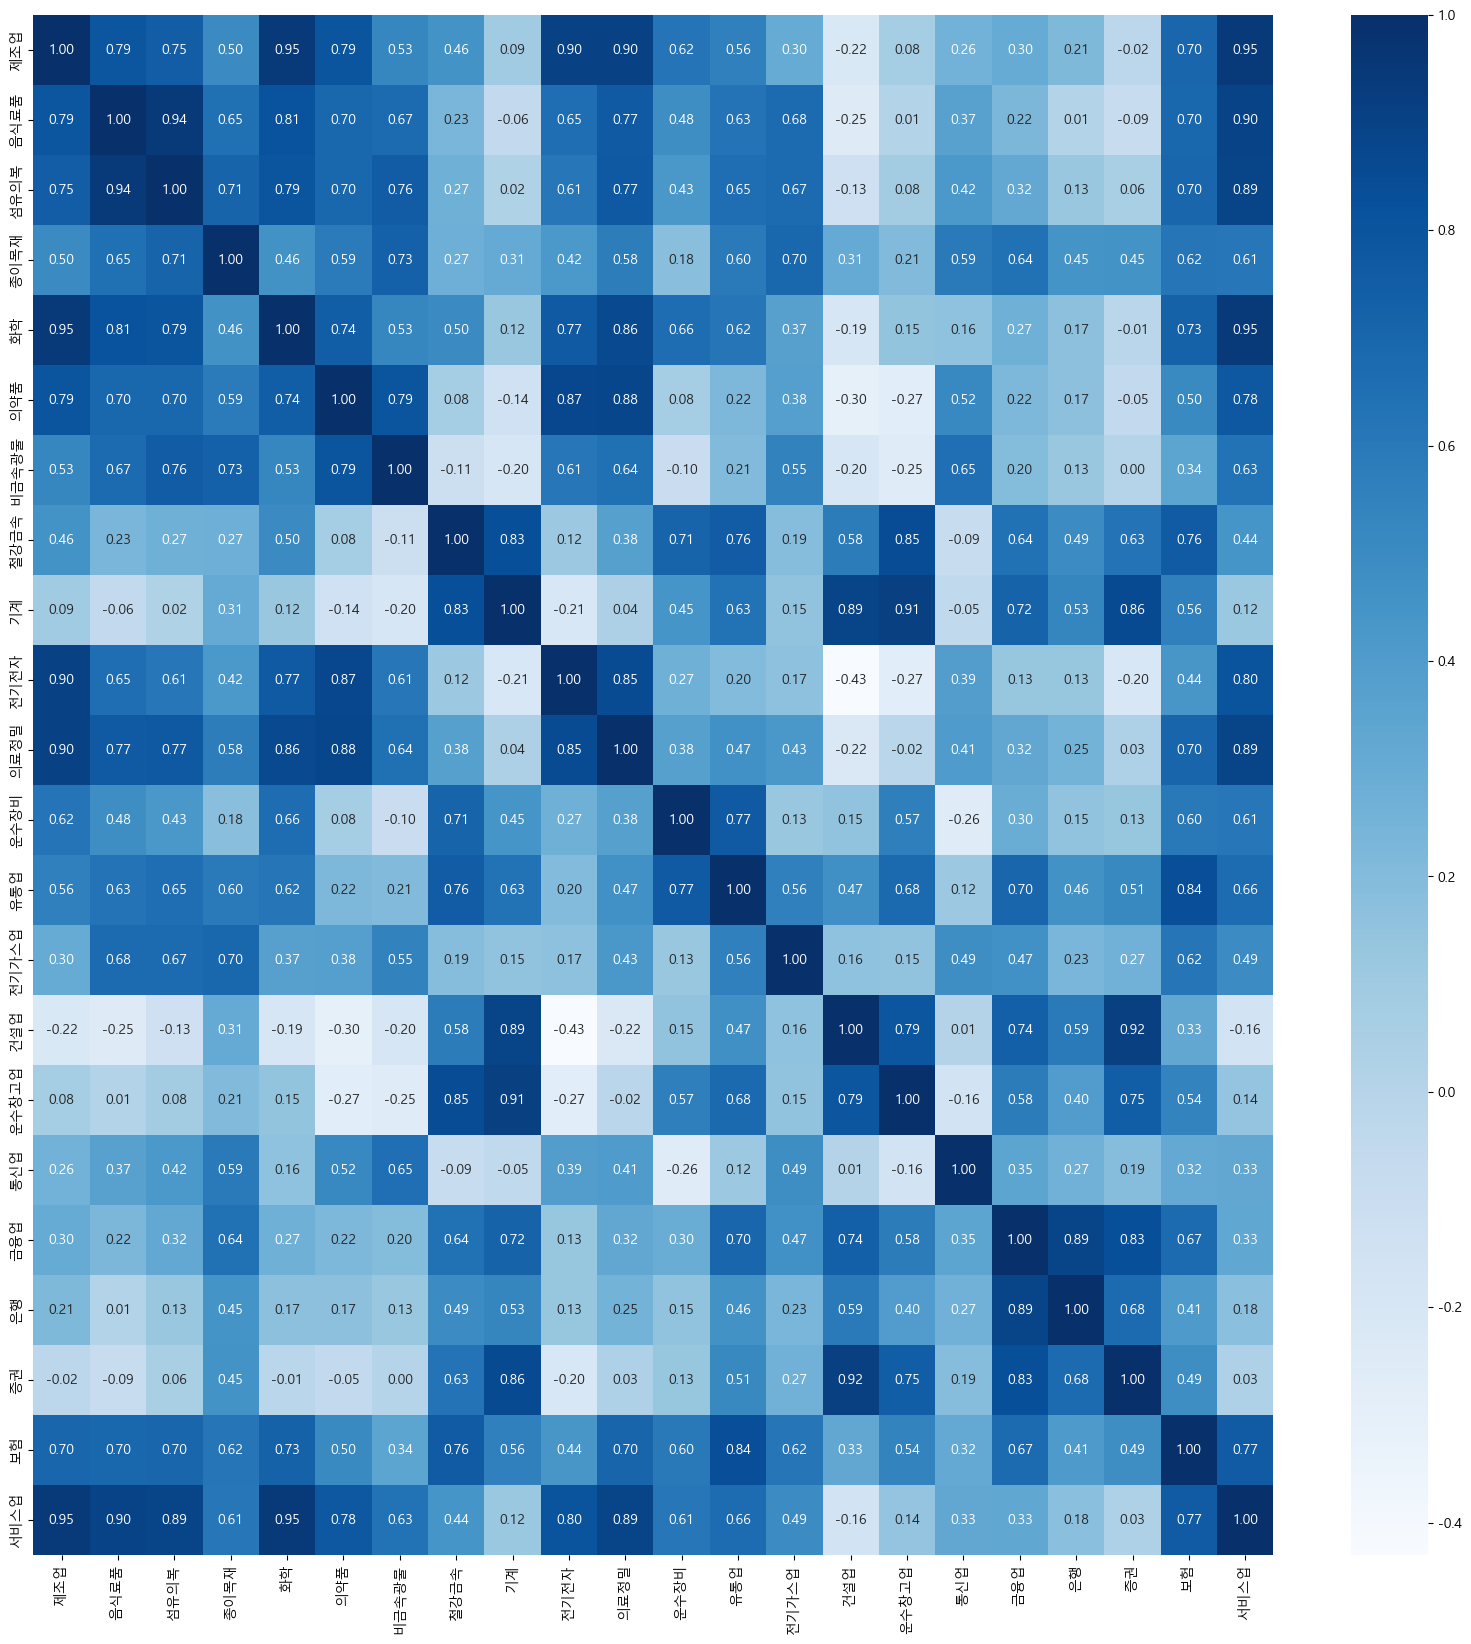

In [36]:
plt.figure(figsize=(20,20))

sns.heatmap(data = df.corr(), annot = True, fmt = '.2f', cmap= 'Blues')


In [39]:
df.mean()

제조업       3598.759278
음식료품      3245.870361
섬유의복       228.667938
종이목재       323.290773
화학        3719.030773
의약품       5558.508093
비금속광물     1088.214175
철강금속      4753.751186
기계        1020.523093
전기전자      9776.756237
의료정밀      1650.695258
운수장비      1709.402680
유통업        443.066804
전기가스업     1077.680258
건설업        165.199278
운수창고업     1974.501856
통신업        325.659742
금융업        451.484948
은행         273.738351
증권        2105.384948
보험       15918.535155
서비스업       894.790155
dtype: float64

In [40]:
df.std()

제조업      1192.957597
음식료품     1169.172889
섬유의복       87.636579
종이목재       65.517214
화학       1497.520152
의약품      3350.213896
비금속광물     377.629677
철강금속     1434.904103
기계        378.267020
전기전자     4371.988765
의료정밀      820.208016
운수장비      685.566921
유통업        92.309759
전기가스업     245.200998
건설업        73.138119
운수창고업     663.436752
통신업        39.873315
금융업        90.278926
은행         58.636475
증권        713.229847
보험       4298.833541
서비스업      260.310274
dtype: float64

In [41]:
import statsmodels.api as sm
from statsmodels.tsa.api import VAR
from statsmodels.tsa.stattools import adfuller

## 정상성 확인 (Stationary Time Series)

In [46]:
len(df.columns)

22

In [65]:
adfuller_test = np.zeros(shape = (len(df.columns),2))
for i in range(len(df.columns)):
    adfuller_test[i,1] = adfuller(df.iloc[:,i], autolag= "AIC")[0]
    adfuller_test[i,2] = adfuller(df.iloc[:,i], autolag= "AIC")[1]

IndexError: index 2 is out of bounds for axis 1 with size 2

In [62]:
np.zeros(shape = (len(df.columns),2))[1,1]

0.0

In [60]:
adfuller(df.iloc[:,1], autolag= "AIC")[0]

-1.7097078351253807

In [64]:
adfuller(df.iloc[:,1], autolag= "AIC")[1]

0.4261177769255058

In [43]:
print("ADF test statistic: {}".format(adfuller_test[0]))
print("p-value: {}".format(adfuller_test[1]))

ADF test statistic: -1.7097078351253807
p-value: 0.4261177769255058
